## Taxi Trip Duration
1. Frame the problem and look at the big picture
2. Get the data
3. Explore the data to gain insights
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms
5. Explore many different models and short-list the best ones
6. Fine-tune your models and combine them into a great solution
7. Present your solution
8. Launch, monitor and maintain your system


## Frame the problem and look at the big picture

The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this playground competition. 
In this project the goal is to make a model based on individual trip attributes, to be able to predict the duration of each trip in the test set.


## Get the data

In [1]:
# get data for dataset

# Common imports
import numpy as np
import os
# to make this notebook's output stable across runs
np.random.seed(42)
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import os
import tarfile
from six.moves import urllib

TAXI_PATH = os.path.join("data", "taxi")

def load_taxi_data(taxi_path=TAXI_PATH):
    csv_path = os.path.join(taxi_path, "train.csv")
    return pd.read_csv(csv_path)

import warnings
warnings.filterwarnings(action="ignore", message="^RuntimeWarning")

In [2]:
taxi = load_taxi_data()
csv_path = os.path.join(TAXI_PATH, "test.csv")
test_set = pd.read_csv(csv_path)
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [3]:
taxi_samples = taxi.sample(frac=0.10)
taxi_samples.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145864 entries, 67250 to 657429
Data columns (total 11 columns):
id                    145864 non-null object
vendor_id             145864 non-null int64
pickup_datetime       145864 non-null object
dropoff_datetime      145864 non-null object
passenger_count       145864 non-null int64
pickup_longitude      145864 non-null float64
pickup_latitude       145864 non-null float64
dropoff_longitude     145864 non-null float64
dropoff_latitude      145864 non-null float64
store_and_fwd_flag    145864 non-null object
trip_duration         145864 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 13.4+ MB


In [4]:
taxi_samples.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
67250,id2793718,2,2016-06-08 07:36:19,2016-06-08 07:53:39,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1397036,id3485529,2,2016-04-03 12:58:11,2016-04-03 13:11:58,1,-73.978394,40.764351,-73.991623,40.749859,N,827
1021087,id1816614,2,2016-06-05 02:49:13,2016-06-05 02:59:27,5,-73.989059,40.744389,-73.973381,40.748692,N,614
951424,id1050851,2,2016-05-05 17:18:27,2016-05-05 17:32:54,2,-73.990326,40.731136,-73.991264,40.748917,N,867
707882,id0140657,1,2016-05-12 17:43:38,2016-05-12 19:06:25,4,-73.789497,40.646675,-73.987137,40.759232,N,4967


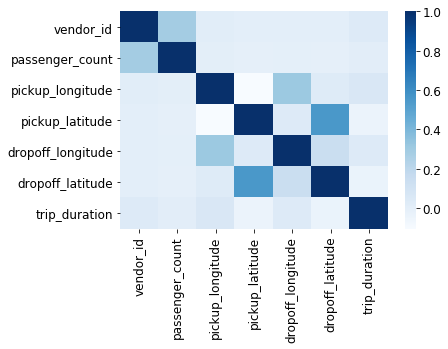

In [5]:
import seaborn as sns
sns.heatmap(taxi_samples.corr(), cmap='Blues')

In [6]:
data_labels = list(taxi_samples)
data_y = {'Duraton': taxi_samples.iloc[:,10]}
X = pd.DataFrame(data=taxi_samples.iloc[:, :-1].values, columns=data_labels[:10])
y = pd.DataFrame(data_y)
X.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2793718,2,2016-06-08 07:36:19,2016-06-08 07:53:39,1,-73.9856,40.7359,-73.9803,40.7605,N
1,id3485529,2,2016-04-03 12:58:11,2016-04-03 13:11:58,1,-73.9784,40.7644,-73.9916,40.7499,N
2,id1816614,2,2016-06-05 02:49:13,2016-06-05 02:59:27,5,-73.9891,40.7444,-73.9734,40.7487,N
3,id1050851,2,2016-05-05 17:18:27,2016-05-05 17:32:54,2,-73.9903,40.7311,-73.9913,40.7489,N
4,id0140657,1,2016-05-12 17:43:38,2016-05-12 19:06:25,4,-73.7895,40.6467,-73.9871,40.7592,N


In [7]:
y.head()

,Duraton
67250,1040
1397036,827
1021087,614
951424,867
707882,4967


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state=42)
X_train.head()

hei
hei


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
47726,id1300757,2,2016-05-04 18:36:52,2016-05-04 19:16:56,1,-73.8709,40.7738,-73.9787,40.7625,N
83469,id3121281,2,2016-05-20 01:44:40,2016-05-20 01:59:37,2,-73.9932,40.6827,-73.9529,40.6525,N
113890,id0447166,2,2016-01-26 11:56:04,2016-01-26 12:04:18,3,-73.9475,40.7906,-73.9594,40.7829,N
395,id1301295,1,2016-02-19 11:08:22,2016-02-19 11:36:11,1,-74.0099,40.7211,-73.8727,40.7743,N
115060,id3613539,2,2016-04-25 16:55:55,2016-04-25 17:07:06,2,-74.0072,40.7054,-73.9652,40.7577,N


In [9]:
X_train['passenger_count'].hist()
print("hei")

hei


In [11]:
import folium # goelogical map
newyork_map = folium.Map(location=[40.767937,-73.982155 ], tiles='OpenStreetMap', zoom_start=12)

In [14]:
def createMap(geo_map, data, i=10):
    for each in X_train[:i].iterrows():
        p1 = [each[1]['pickup_latitude'] ,each[1]['pickup_longitude']]
        p2 = [each[1]['dropoff_latitude'], each[1]['dropoff_longitude']]
        folium.CircleMarker(p1,
                            radius=3,
                            color='blue',
                            popup=str(each[1]['pickup_latitude'])+','+str(each[1]['pickup_longitude']),
                            fill_color='#FD8A6C'
                            ).add_to(geo_map)
        folium.CircleMarker(p2,
                            radius=3,
                            color='red',
                            popup=str(each[1]['dropoff_latitude'])+','+str(each[1]['dropoff_longitude']),
                            fill_color='#FD8A6C'
                            ).add_to(geo_map)
        folium.PolyLine(locations=[p1, p2], color='green').add_to(geo_map)
    
createMap(newyork_map, X_train)

newyork_map

In [16]:
import mpu

def calculateDistances(data, distances):
    for each in data.iterrows():
        lat1 = float(each[1]['pickup_latitude'])
        lon1 = float(each[1]['pickup_longitude'])
        lat2 = float(each[1]['dropoff_latitude'])
        lon2 = float(each[1]['dropoff_longitude'])
        dist = mpu.haversine_distance((lat1, lon1), (lat2, lon2))
        distances.append(dist)
        

distances = []
calculateDistances(X_train, distances)

distances = np.array(distances)
X_train_copy = X_train.copy()
X_train_copy['Distance'] = distances
X_train_copy.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,Distance
47726,id1300757,2,2016-05-04 18:36:52,2016-05-04 19:16:56,1,-73.8709,40.7738,-73.9787,40.7625,N,9.161363
83469,id3121281,2,2016-05-20 01:44:40,2016-05-20 01:59:37,2,-73.9932,40.6827,-73.9529,40.6525,N,4.780321
113890,id0447166,2,2016-01-26 11:56:04,2016-01-26 12:04:18,3,-73.9475,40.7906,-73.9594,40.7829,N,1.318140
395,id1301295,1,2016-02-19 11:08:22,2016-02-19 11:36:11,1,-74.0099,40.7211,-73.8727,40.7743,N,12.989188
115060,id3613539,2,2016-04-25 16:55:55,2016-04-25 17:07:06,2,-74.0072,40.7054,-73.9652,40.7577,N,6.810164


In [22]:

#time
X_train_copy['passenger_count'] =pd.to_numeric(X_train.passenger_count)
X_train_copy['wday']            = pd.to_datetime(X_train_copy.pickup_datetime).dt.dayofweek.astype('uint8')
X_train_copy['day']             = pd.to_datetime(X_train_copy.pickup_datetime).dt.day.astype('uint8')
X_train_copy['hour']            = pd.to_datetime(X_train_copy.pickup_datetime).dt.hour.astype('uint8')
X_train_copy['minute']          = pd.to_datetime(X_train_copy.pickup_datetime).dt.minute.astype('uint8')
X_train_copy['second']          = pd.to_datetime(X_train_copy.pickup_datetime).dt.second.astype('uint8')
X_train_copy["doy"]             = pd.to_datetime(X_train_copy.pickup_datetime).dt.dayofyear.astype('uint8')

# X_train            = X_train.drop(['click_time', 'attributed_time'], axis=1)
print(X_train_copy.dtypes)

    

id                     object
vendor_id              object
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude       object
pickup_latitude        object
dropoff_longitude      object
dropoff_latitude       object
store_and_fwd_flag     object
Distance              float64
hour                    uint8
day                     uint8
wday                    uint8
minute                  uint8
second                  uint8
doy                     uint8
dtype: object


In [21]:
X_train_copy.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,Distance,hour,day,wday,minute,second,doy
47726,id1300757,2,2016-05-04 18:36:52,2016-05-04 19:16:56,1,-73.8709,40.7738,-73.9787,40.7625,N,9.161363,18,4,2,36,52,125
83469,id3121281,2,2016-05-20 01:44:40,2016-05-20 01:59:37,2,-73.9932,40.6827,-73.9529,40.6525,N,4.780321,1,20,4,44,40,141
113890,id0447166,2,2016-01-26 11:56:04,2016-01-26 12:04:18,3,-73.9475,40.7906,-73.9594,40.7829,N,1.318140,11,26,1,56,4,26
395,id1301295,1,2016-02-19 11:08:22,2016-02-19 11:36:11,1,-74.0099,40.7211,-73.8727,40.7743,N,12.989188,11,19,4,8,22,50
115060,id3613539,2,2016-04-25 16:55:55,2016-04-25 17:07:06,2,-74.0072,40.7054,-73.9652,40.7577,N,6.810164,16,25,0,55,55,116
